## Análise Estatística do Impacto do Curso nos Simulados

### Objetivo
Verificar se houve melhora significativa no desempenho dos alunos após o curso, comparando a pontuação no Simulado Diagnóstico (inicial) com o Simulado Final.

### Hipóteses
- **H₀ (hipótese nula):** Não há diferença significativa entre as notas do Simulado Diagnóstico e Final.  
- **H₁ (hipótese alternativa):** Há uma melhora significativa nas notas do Simulado Final em relação ao Diagnóstico.  

### Metodologia
1. Exploração inicial dos dados (estatísticas descritivas e visualizações).  
2. Teste de normalidade (Shapiro-Wilk).  
   - **Resultado:** Diagnóstico ≈ normal; Final não segue normalidade.  
3. Teste de homogeneidade de variâncias (Levene).  
   - **Resultado:** Variâncias homogêneas.  
4. Escolha do teste estatístico:  
   - Como não há normalidade em uma das distribuições, foi aplicado o **teste de Wilcoxon pareado**.  
5. Conclusão baseada no p-valor e interxpretação no contexto pedagógico.

## Nota sobre a métrica usada
Trabalhamos com pontuação por acertos (número de questões corretas em cada simulado). Como todos os simulados têm o mesmo número de questões e cada questão vale 1 ponto, essa métrica é inteira (contagem) e diretamente comparável entre as duas medições do mesmo aluno (Diagnóstico vs. Final).
Para os testes de hipótese, utilizamos pares 'nota_diagnostico', 'nota_final' por aluno.

Portanto, não há necessidade de padronização ou transformação adicional, e a comparação direta entre os dois simulados é válida.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from src.funcoes_projeto3 import carregar_notas_alunos, teste_shapiro, teste_levene, teste_wilcoxon
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

In [2]:
df_notas = carregar_notas_alunos()
print(df_notas.head())

   id_aluno  nota_diagnostico  nota_final
0         1                12          11
1         2                12           9
2         3                10          11
3         4                12           9
4         5                 9          11


In [3]:
df_notas.shape

(35, 3)

In [4]:
df_notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id_aluno          35 non-null     int64
 1   nota_diagnostico  35 non-null     int64
 2   nota_final        35 non-null     int64
dtypes: int64(3)
memory usage: 972.0 bytes


In [5]:
df_notas.isnull().sum()

id_aluno            0
nota_diagnostico    0
nota_final          0
dtype: int64

In [6]:
df_notas.duplicated().sum()

np.int64(0)

In [7]:
df_notas.describe()

,id_aluno,nota_diagnostico,nota_final
count,35.000000,35.000000,35.000000
mean,18.000000,10.628571,10.200000
std,10.246951,2.438487,2.111593
min,1.000000,5.000000,6.000000
25%,9.500000,9.000000,9.000000
50%,18.000000,11.000000,11.000000
75%,26.500000,12.000000,12.000000
max,35.000000,15.000000,16.000000


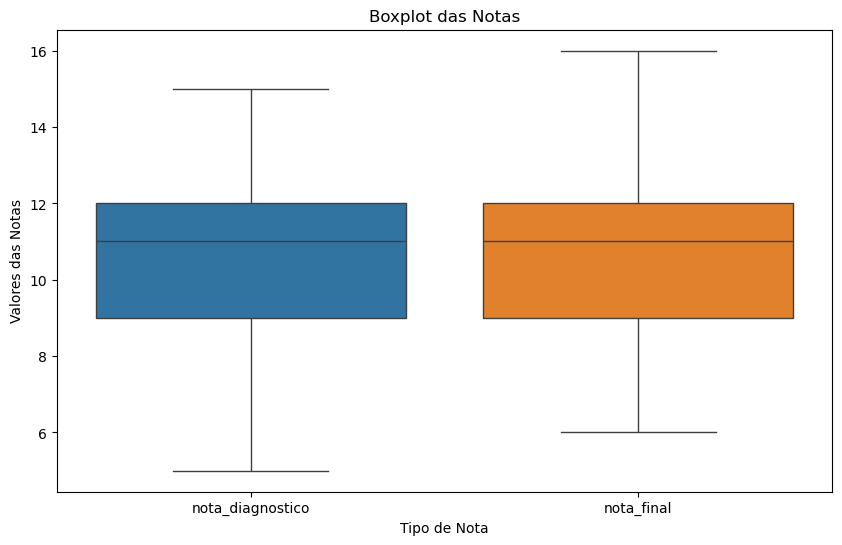

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_notas[['nota_diagnostico', 'nota_final']])
plt.title('Boxplot das Notas')
plt.ylabel('Valores das Notas')
plt.xlabel('Tipo de Nota')
plt.show()

### Análise Exploratória - Distribuição das Notas

**Boxplots:**  
Os boxplots de `nota_diagnostico` e `nota_final` indicam distribuições bastante semelhantes.  
- As medianas de ambas as provas estão próximas (em torno de 11).  
- A dispersão dos dados também é parecida, concentrada entre 9 e 12.  
- Não há presença significativa de outliers, apenas alguns valores mais afastados.  

Isso sugere que o desempenho dos alunos manteve-se estável entre o simulado diagnóstico e o final.

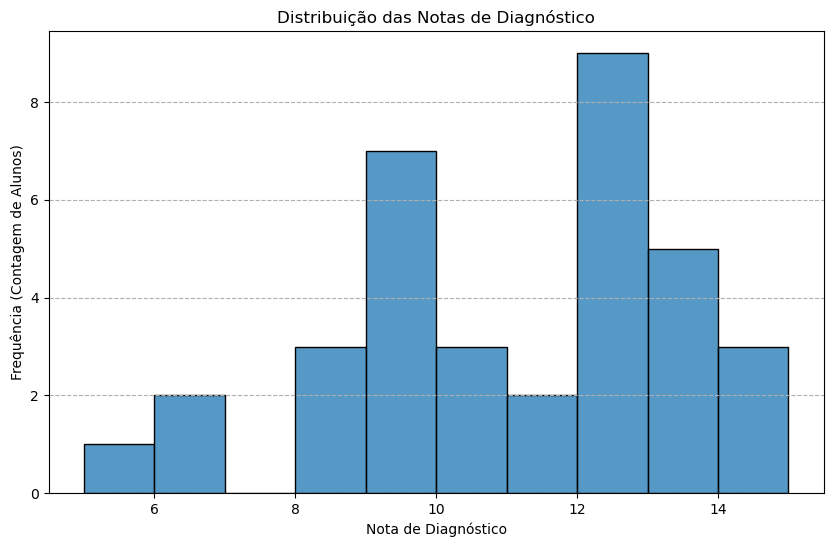

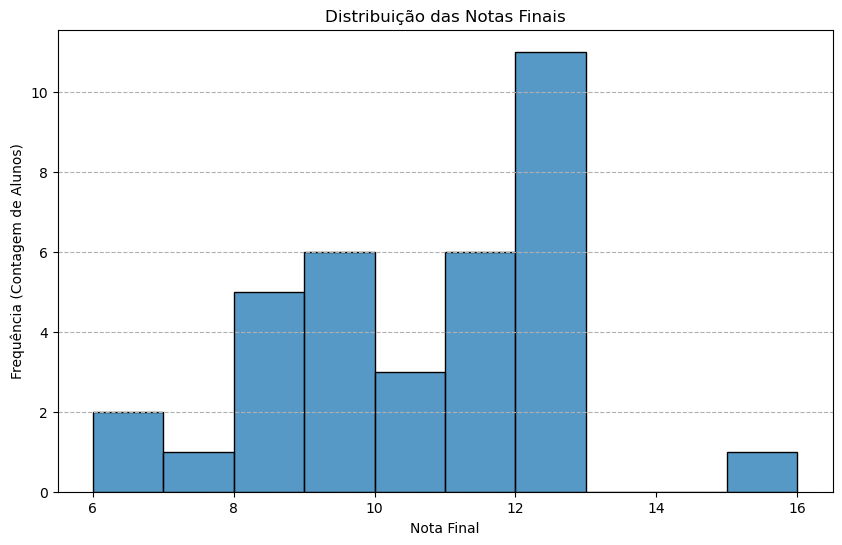

In [9]:
#Histograma do simulado diagnostico
plt.figure(figsize=(10, 6))
sns.histplot(data=df_notas, x='nota_diagnostico', bins=10, kde=False)
plt.title('Distribuição das Notas de Diagnóstico')
plt.xlabel('Nota de Diagnóstico')
plt.ylabel('Frequência (Contagem de Alunos)')
plt.grid(axis='y', linestyle='--')
plt.show()

#Histograma do simulado final
plt.figure(figsize=(10, 6))
sns.histplot(data=df_notas, x='nota_final', bins=10, kde=False)
plt.title('Distribuição das Notas Finais')
plt.xlabel('Nota Final')
plt.ylabel('Frequência (Contagem de Alunos)')
plt.grid(axis='y', linestyle='--')
plt.show()

### Análise Exploratória - Distribuição das Notas

**Histogramas:**  
- O histograma de `nota_diagnostico` apresenta distribuição relativamente simétrica, concentrada principalmente entre 9 e 13, com pico em torno de 12. Há uma pequena cauda à esquerda (alunos com notas mais baixas, entre 5 e 7).  
- O histograma de `nota_final` também mostra concentração entre 9 e 13, mas com maior agrupamento em torno de 11–12. Além disso, surge um caso isolado de nota mais alta (16), ampliando a dispersão para cima.  

**Interpretação:**
De forma preliminar, a análise gráfica aponta distribuições semelhantes entre os dois simulados, com indícios de desempenho ligeiramente superior no final.

In [10]:
print(teste_shapiro(df_notas['nota_diagnostico'], "Diagnóstico"))
print(teste_shapiro(df_notas['nota_final'], "Final"))

Shapiro (Diagnóstico): stat=0.947, p=0.092 - A distribuição segue aproximadamente normal.
Shapiro (Final): stat=0.922, p=0.016 - A distribuição **não segue** uma distribuição normal.


In [11]:
print(teste_levene(df_notas['nota_diagnostico'], df_notas['nota_final'], "Diagnóstico", "Final"))

Levene (Diagnóstico vs Final): stat=0.876, p=0.352 - As variâncias podem ser consideradas iguais.


### Testes de Normalidade e Homogeneidade de Variâncias

**Shapiro-Wilk:**  
- Diagnóstico - p = 0.092 (> 0.05) - não rejeitamos a hipótese nula.  
  Assim, a distribuição das notas de diagnóstico **pode ser considerada aproximadamente normal**.  
- Final - p = 0.016 (< 0.05) - rejeitamos a hipótese nula.  
  Logo, a distribuição das notas do simulado final **não segue distribuição normal**.  

**Levene:**  
- p = 0.352 (> 0.05) - não rejeitamos a hipótese nula.  
  Portanto, as variâncias entre diagnóstico e final podem ser consideradas **iguais**.  

**Interpretação:**  
- Como pelo menos uma das distribuições (nota final) não segue normalidade, o uso de testes paramétricos (como o t de Student pareado) pode não ser adequado.  
- O teste mais indicado para comparar as duas situações é o **Wilcoxon**, que é a alternativa não paramétrica para amostras pareadas.  

In [12]:
print(teste_wilcoxon(df_notas['nota_diagnostico'], df_notas['nota_final'], 
                     "Diagnóstico", "Final"))

Wilcoxon (Diagnóstico vs Final): stat=179.500, p=0.408 - Não rejeitamos H0: não há diferença significativa entre os grupos.


### Teste de Wilcoxon (pareado)
Não encontramos evidência estatística de que o curso tenha produzido uma melhora significativa entre os dois simulados (Wilcoxon pareado: estatística = 179.500; p = 0.408). Assim, não rejeitamos H₀.

Decisão: como p > 0,05, não rejeitamos H₀.

Interpretação: com os dados disponíveis, não há evidência estatística de diferença entre as notas do Simulado Diagnóstico e do Simulado Final no grupo como um todo. Em termos práticos, houve variação individual (alguns alunos melhoraram, outros mantiveram ou caíram), mas o efeito não foi consistente o suficiente para aparecer como diferença significativa no nível de grupo.

## Nota de cautela metodológica.
Os resultados devem ser interpretados considerando:

- Amostra relativamente pequena (n = 35);
- Uso de acertos brutos em escala inteira, sem controle por covariáveis (ex.: assiduidade, tempo de estudo, perfil socioeducacional);
- Dados de um único ciclo/turma.

Estudos futuros com amostras maiores, segmentações (por disciplina/tema/perfil) e dados externos (ex.: desempenho no vestibular) podem revelar efeitos não visíveis no agregado.